In [5]:
#imports
#pandas
import pandas as pd
from pandas import Series, DataFrame

#numoy, matplotlib,seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv('C:/Users/yutin/Desktop/py4e/Python_DS/kaggle/titanic/train.csv')
#preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#观察数据和数据类型
titanic_df.info()
#drop unnecessary data
titanic_df=titanic_df.drop(['PassengerId','Name','Ticket'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


C:\Users\yutin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\yutin\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


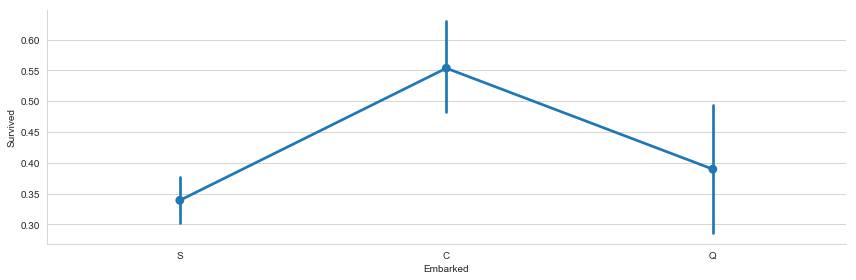

In [11]:
#embarked
#only in titanic_df, fill the two missing values with the most occurred values, which is "S"
titanic_df['Embarked']=titanic_df['Embarked'].fillna('S')
#plot
sns.factorplot('Embarked','Survived',data=titanic_df,size=4,aspect=3)

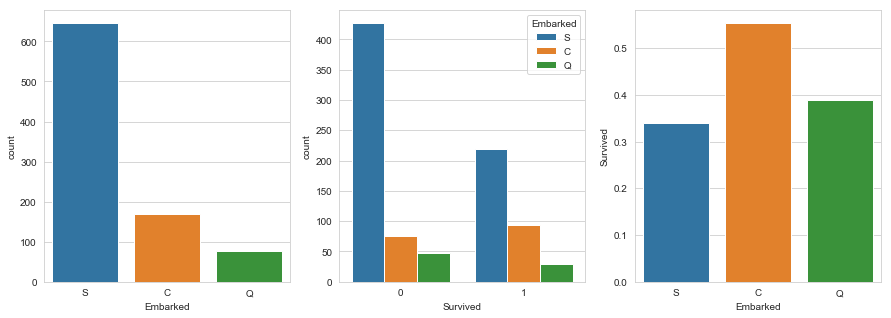

In [22]:
fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(15,5))
#统计embarked的频率
sns.countplot(x='Embarked',data=titanic_df,ax=axis1)
#按照是否survive将embarked分类
sns.countplot(x='Survived',hue='Embarked',data=titanic_df,ax=axis2)
#在survive里面统计embarked的频率
embark_perc = titanic_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked',y='Survived',data=embark_perc,order=['S','C','Q'],ax=axis3)

In [37]:
#convert float to int
#作图过程中注意各数据类型是否是数字本身
titanic_df['Fare']=titanic_df['Fare'].astype(int)

#get fare for survived & did not survive 
fare_not_survived = titanic_df['Fare'][titanic_df['Survived']==0]
fare_survived = titanic_df['Fare'][titanic_df['Survived']==1]

#get the average the std for fare of survive/not survive passangers
average_fare=DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(),fare_survived.std()])

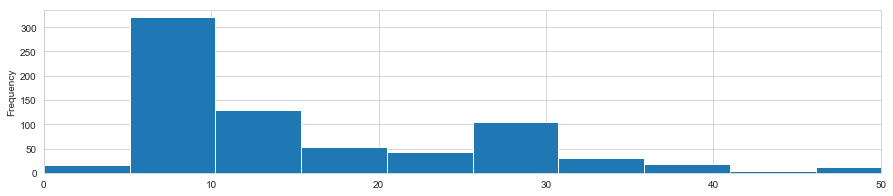

In [33]:
#plot
#Fare的频率统计

titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

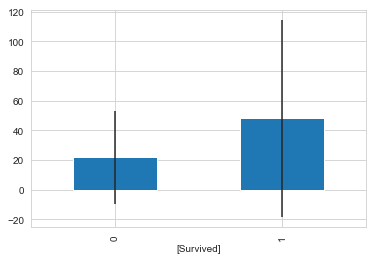

In [38]:
#根据survived的fare的箱图
average_fare.index.name = std_fare.index.name = ['Survived']
average_fare.plot(yerr=std_fare,kind='bar',legend=False)

NameError: name 'rand_1' is not defined

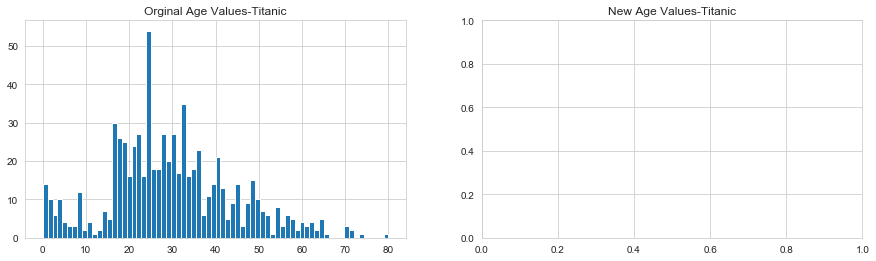

In [43]:
#Age
#确定有连子图
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,4))
#set图的title
axis1.set_title('Orginal Age Values-Titanic')
axis2.set_title('New Age Values-Titanic')

#用原始年龄数据画图
titanic_df['Age'].dropna().astype(int).hist(bins=70,ax=axis1)

#对年龄进行数据处理
titanic_df['Age'][np.isnan(titanic_df['Age'])]= rand_1
#对数据进行整数处理
titanix_df['Age']=titanic_df['Age'].astype(int)

#画新图
titanic_df['Age'].hist(bins=70,ax=axis2)

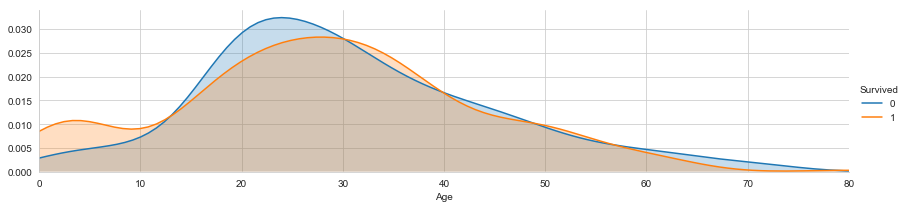

In [45]:
#继续画一张曲线图，按照survived分开画
#sns这个不明白
facet = sns.FacetGrid(titanic_df,hue='Survived',aspect =4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

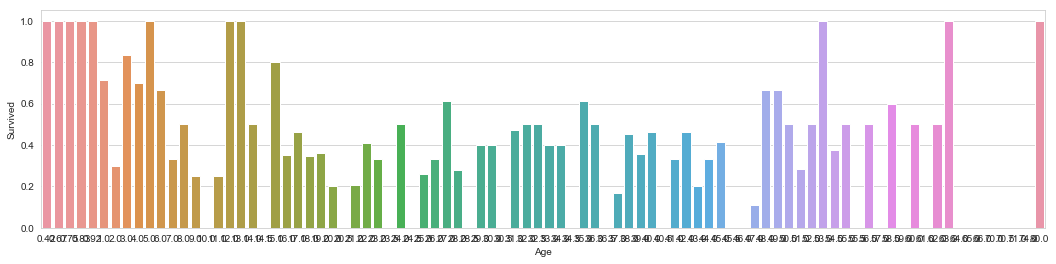

In [46]:
#根据年龄统计存货的平均人数
fig.axis1=plt.subplots(1,1,figsize=(18,4))
average_age=titanic_df[['Age','Survived']].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age',y='Survived',data=average_age)

In [48]:
#carbin这个参数缺失值太多 直接删去
titanic_df.drop('Cabin',axis=1,inplace=True)

In [50]:
#family
#parch&sibsp补位零，代表是和家人一起的
titanic_df['Family']=titanic_df['Parch']+titanic_df['SibSp']
titanic_df['Family'].loc[titanic_df['Family']>0]=1
titanic_df['Family'].loc[titanic_df['Family']==0]=0

C:\Users\yutin\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[Text(0, 0, 'With Family'), Text(0, 0, 'Alone')]

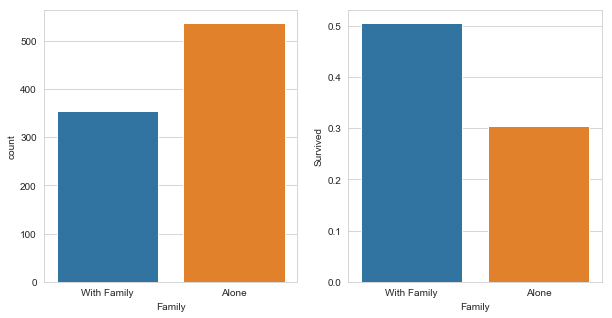

In [60]:
#plot
fig,(axis1,axis2)=plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x='Family',data=titanic_df,order=[1,0],ax=axis1)

#average of survived for those who had/had not  have any family member
family_perc = titanic_df[['Family','Survived']].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family',y='Survived',data=family_perc,order=[1,0],ax=axis2)

axis2.set_xticklabels(["With Family","Alone"], rotation=0)


In [64]:
#sex
#按照成人先分，再分成男人和女人
#把未成年人分出去
def get_person(passenger):
    age,sex=passenger
    return 'child' if age<16 else sex
titanic_df['Person']=titanic_df[['Age','Sex']].apply(get_person,axis=1)
#create dummy variables for person column & drop male as it has the lowest average of survived passengers
person_dummies_titanic = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'],axis=1,inplace=True)


In [71]:



titanic_df = titanic_df.join(person_dummies_titanic)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

ValueError: columns overlap but no suffix specified: Index(['Child', 'Female'], dtype='object')

C:\Users\yutin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\yutin\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


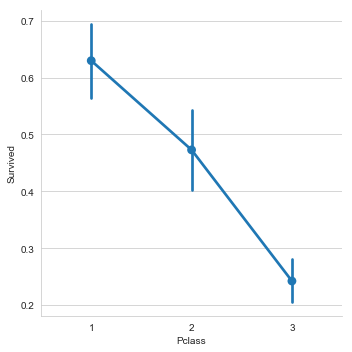

In [70]:
#Pclass
sns.factorplot('Pclass','Survived',order=[1,2,3],data=titanic_df,size=5)
